# Regression Plots for cas9 dataset

Script used for plotting regression line using python.

Load the required python modules

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
#set higher dpi for figures
plt.rcParams['figure.dpi'] = 150

Read all the data files. The data files from excel was exported as CSV files, filling in the columns for mismatch and experiment type.

In [134]:
hypa = "hypa-input.csv"
hf1 = "hf1-input.csv"
hifi = "hifi-input.csv"
sa = "sa-input.csv"
sp = "sp-input.csv"
dfhypa = pd.read_csv(hypa)
dfhf1 = pd.read_csv(hf1)
dfhifi = pd.read_csv(hifi)
dfsa = pd.read_csv(sa)
dfsp = pd.read_csv(sp)

### Hypa analyses

We will expore the first dataset and make the required plots.

In [135]:
dfhypa.head(5)

,EXPT,MM,TYPE,K1,K2
0,Hypa,1 MM,20A,0.2422,0.3012
1,Hypa,1 MM,20G,0.2630,0.2444
2,Hypa,1 MM,20C,0.4533,0.4082
3,Hypa,1 MM,20T,1.8900,1.8370
4,Hypa,1 MM,19A,0.7560,0.9296


In [136]:
dfhypa.describe()

,K1,K2
count,959.000000,959.000000
mean,0.284407,0.252972
std,0.498053,0.467777
min,0.000000,0.000000
25%,0.000369,0.000322
50%,0.012080,0.008014
75%,0.297650,0.266750
max,2.997000,2.496000


to inspece how the data is distributed for each mismatch, we will visulaize the dataset with boxplot

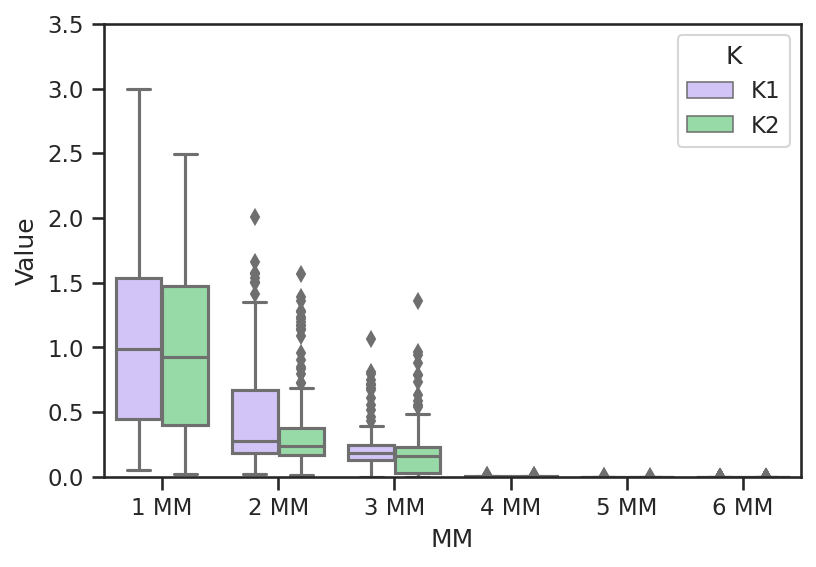

In [137]:
dfhypa_long = pd.melt(dfhypa, id_vars =['MM'], value_vars =['K1', 'K2'], var_name ='K', value_name ='Value')
dfhypa_long.head(10)
sns.set_theme(style="ticks", palette="pastel")
plt.ylim(0 , 3.5)
sns.boxplot(x="MM", y="Value",
            hue="K", palette=["m", "g"],
            data=dfhypa_long)
plt.savefig('boxplot_hypa-Cas9.pdf')

Next, we will see the corelation between K1 and K2

In [138]:
x = dfhypa['K1']
y = dfhypa['K2']

Statistics:

In [139]:
scipy.stats.pearsonr(x, y)

(0.9707831221331557, 0.0)

In [140]:
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=0.9873245182224624, pvalue=0.0)

In [141]:
scipy.stats.kendalltau(x, y)

KendalltauResult(correlation=0.9216686932142392, pvalue=0.0)

In [142]:
scipy.stats.linregress(x, y)

LinregressResult(slope=0.9117708240107306, intercept=-0.006342042511278068, rvalue=0.9707831221331557, pvalue=0.0, stderr=0.007285239349189512)

Plot the regression:

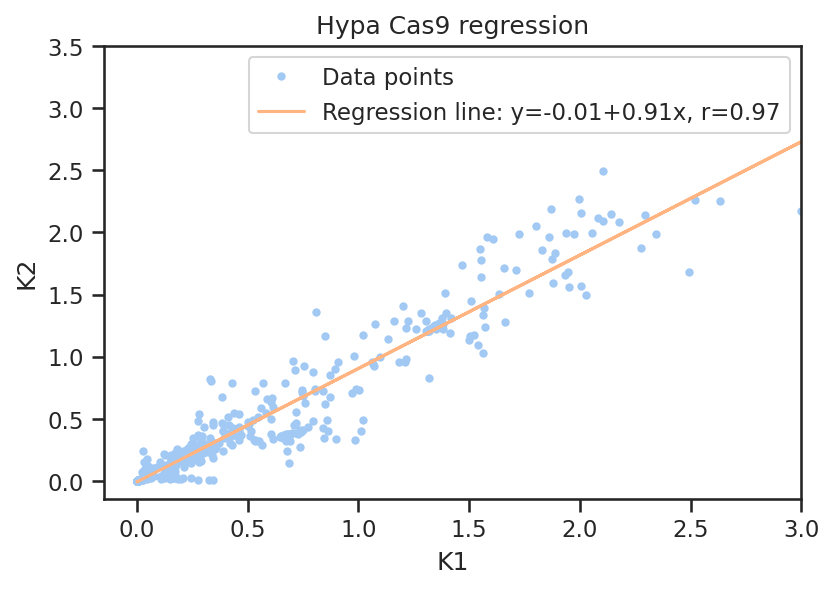

In [143]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='.', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('K1')
ax.set_ylabel('K2')
ax.legend(facecolor='white')
plt.ylim(ymax = 3.5)
plt.xlim(xmax = 3)
plt.title('Hypa Cas9 regression')
plt.savefig('regression_HypaCas9.pdf')

### HF1 analyses

In [144]:
dfhf1.head(5)

,EXPT,MM,TYPE,K1,K2
0,HF1,1 MM,20A,0.03704,0.05872
1,HF1,1 MM,20G,0.02456,0.03214
2,HF1,1 MM,20C,0.20300,0.20760
3,HF1,1 MM,20T,1.47500,1.42900
4,HF1,1 MM,19A,0.21870,0.21950


In [145]:
dfhf1.describe()

,K1,K2
count,959.000000,959.000000
mean,0.249917,0.268498
std,0.370286,0.531846
min,0.000000,0.000000
25%,0.000880,0.000744
50%,0.137800,0.005632
75%,0.329500,0.209050
max,1.988000,4.289000


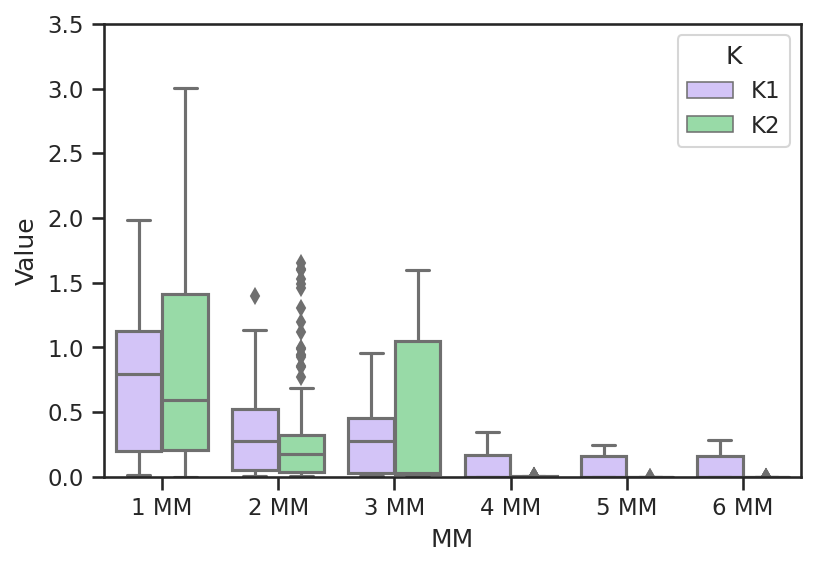

In [146]:
dfhf1_long = pd.melt(dfhf1, id_vars =['MM'], value_vars =['K1', 'K2'], var_name ='K', value_name ='Value')
dfhf1_long.head(10)
sns.set_theme(style="ticks", palette="pastel")
plt.ylim(0 , 3.5)
sns.boxplot(x="MM", y="Value",
            hue="K", palette=["m", "g"],
            data=dfhf1_long)
plt.savefig('boxplot_hf1-Cas9.pdf')

In [147]:
x = dfhf1['K1']
y = dfhf1['K2']

In [148]:
scipy.stats.pearsonr(x, y)

(0.8569497478901903, 1.0009957697860498e-277)

In [149]:
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=0.7793424376861995, pvalue=1.7297842826713594e-196)

In [150]:
scipy.stats.kendalltau(x, y)

KendalltauResult(correlation=0.6410378061729722, pvalue=3.4527518133168694e-190)

In [151]:
scipy.stats.linregress(x, y)

LinregressResult(slope=1.230846582490736, intercept=-0.039111669447180475, rvalue=0.8569497478901903, pvalue=1.0009957697858178e-277, stderr=0.023929685412270377)

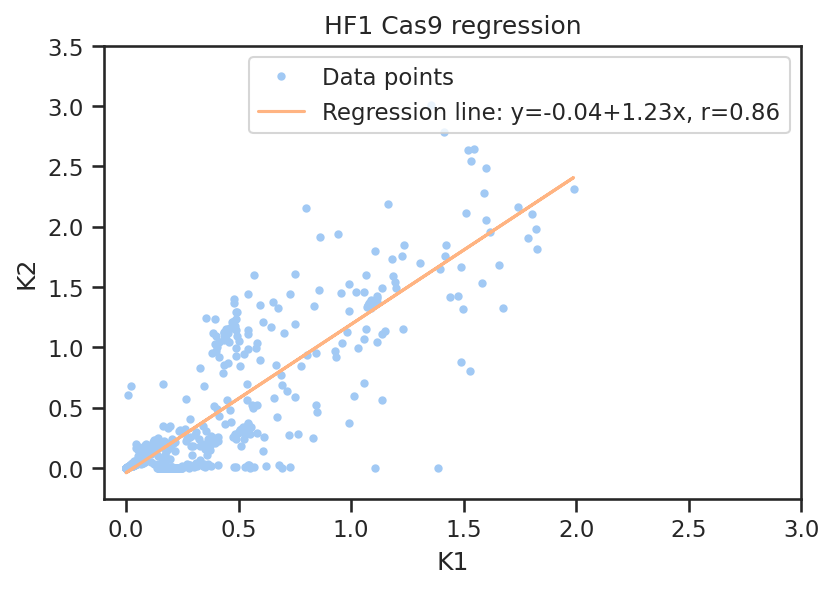

In [152]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='.', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('K1')
ax.set_ylabel('K2')
ax.legend(facecolor='white')
plt.ylim(ymax = 3.5)
plt.xlim(xmax = 3)
plt.title('HF1 Cas9 regression')
plt.savefig('regression_HF1Cas9.pdf')

### HiFi analyses

In [153]:
dfhifi.head(5)

,EXPT,MM,TYPE,K1,K2
0,HiFi,1 MM,20A,1.1350,1.0170
1,HiFi,1 MM,20G,0.3243,0.4252
2,HiFi,1 MM,20C,1.0420,0.8410
3,HiFi,1 MM,20T,1.8560,1.4120
4,HiFi,1 MM,19A,0.3658,0.5719


In [154]:
dfhifi.describe()

,K1,K2
count,959.000000,959.000000
mean,0.400965,0.350813
std,0.553040,0.484255
min,0.000000,0.000000
25%,0.000496,0.000554
50%,0.027850,0.008748
75%,0.728300,0.730250
max,2.194000,2.049000


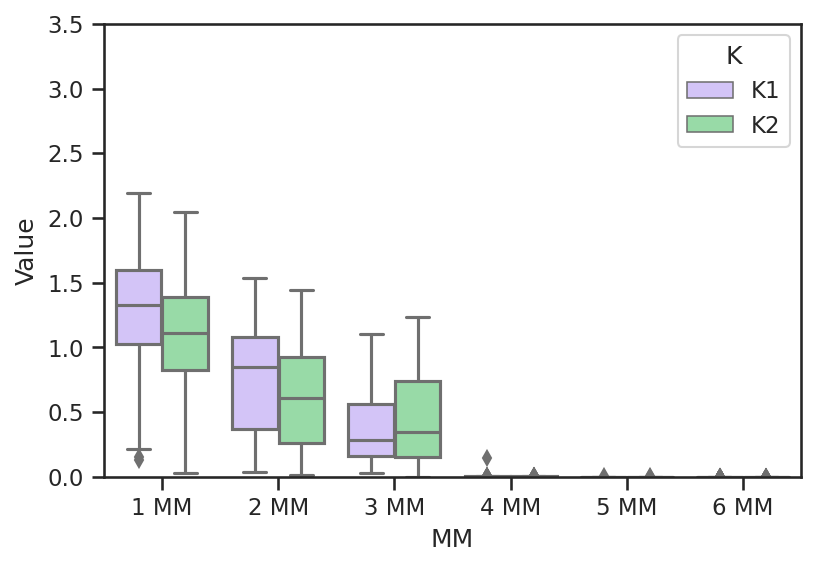

In [155]:
dfhifi_long = pd.melt(dfhifi, id_vars =['MM'], value_vars =['K1', 'K2'], var_name ='K', value_name ='Value')
dfhifi_long.head(10)
plt.ylim(0 , 3.5)
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="MM", y="Value",
            hue="K", palette=["m", "g"],
            data=dfhifi_long)
plt.savefig('boxplot_hif1-Cas9.pdf')

In [156]:
x = dfhifi['K1']
y = dfhifi['K2']

In [157]:
scipy.stats.pearsonr(x, y)

(0.9536602747900079, 0.0)

In [158]:
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=0.9752820715857918, pvalue=0.0)

In [159]:
scipy.stats.kendalltau(x, y)

KendalltauResult(correlation=0.8891126283596447, pvalue=0.0)

In [160]:
scipy.stats.kendalltau(x, y)

KendalltauResult(correlation=0.8891126283596447, pvalue=0.0)

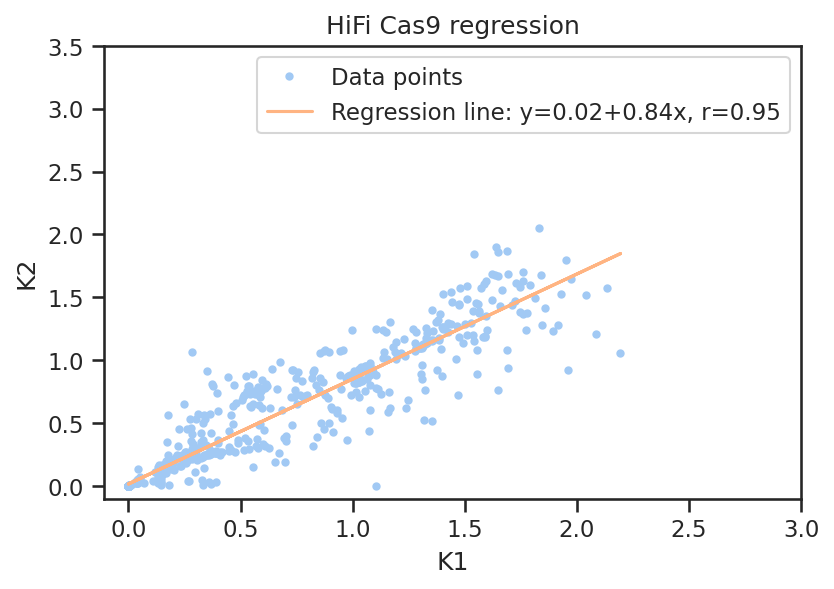

In [161]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='.', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('K1')
ax.set_ylabel('K2')
ax.legend(facecolor='white')
plt.ylim(ymax = 3.5)
plt.xlim(xmax = 3)
plt.title('HiFi Cas9 regression')
plt.savefig('regression_HiFiCas9.pdf')

### SA analyses

In [162]:
dfsa.head(5)

,EXPT,MM,TYPE,K1,K2
0,SA,1 MM,20A,0.7751,0.9633
1,SA,1 MM,20G,0.7208,0.7441
2,SA,1 MM,20C,0.9748,0.7674
3,SA,1 MM,20T,0.9919,0.9028
4,SA,1 MM,19A,1.4960,2.0400


In [163]:
dfsa.describe()

,K1,K2
count,959.000000,959.000000
mean,0.188766,0.211184
std,0.402208,0.346368
min,0.000000,0.000000
25%,0.000321,0.001886
50%,0.008940,0.050610
75%,0.204550,0.266450
max,5.106000,2.658000


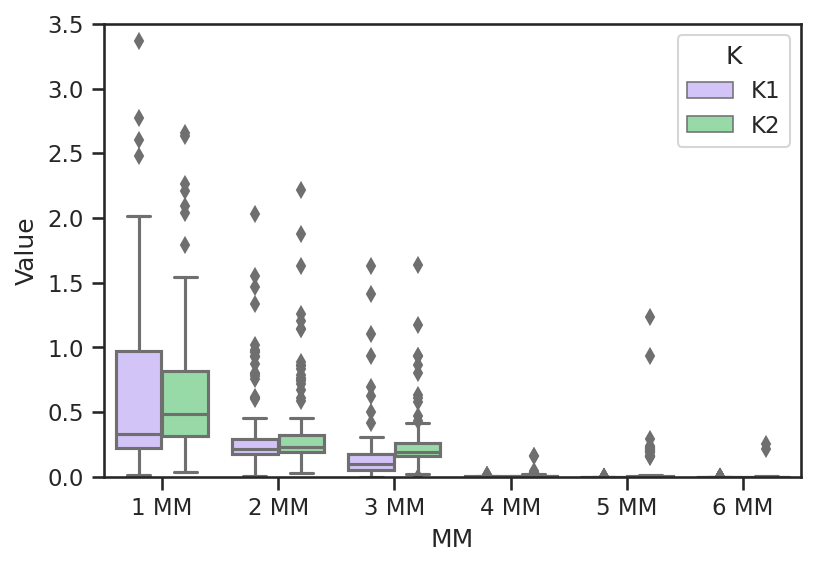

In [164]:
dfsa_long = pd.melt(dfsa, id_vars =['MM'], value_vars =['K1', 'K2'], var_name ='K', value_name ='Value')
dfsa_long.head(10)
sns.set_theme(style="ticks", palette="pastel")
plt.ylim(0 , 3.5)
sns.boxplot(x="MM", y="Value",
            hue="K", palette=["m", "g"],
            data=dfsa_long)
plt.savefig('boxplot_sa-Cas9.pdf')

In [165]:
x = dfsa['K1']
y = dfsa['K2']

In [166]:
scipy.stats.pearsonr(x, y)

(0.8115720920697229, 1.375355165709624e-225)

In [167]:
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=0.8854007116357907, pvalue=1.157e-320)

In [168]:
scipy.stats.kendalltau(x, y)

KendalltauResult(correlation=0.7239130947477278, pvalue=2.1428629314015239e-237)

In [169]:
scipy.stats.kendalltau(x, y)

KendalltauResult(correlation=0.7239130947477278, pvalue=2.1428629314015239e-237)

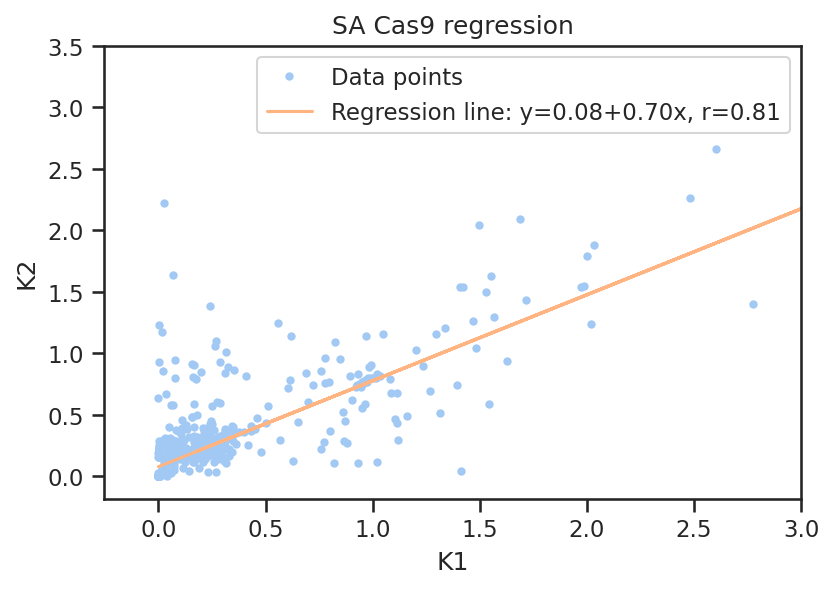

In [170]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='.', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('K1')
ax.set_ylabel('K2')
ax.legend(facecolor='white')
plt.ylim(ymax = 3.5)
plt.xlim(xmax = 3)
plt.title('SA Cas9 regression')
plt.savefig('regression_SACas9.pdf')

### SP analyses

In [171]:
dfsp.head(5)

,EXPT,MM,TYPE,K1,K2
0,SP,1 MM,20A,1.141,0.5094
1,SP,1 MM,20G,1.177,0.8260
2,SP,1 MM,20C,1.059,0.4808
3,SP,1 MM,20T,1.559,0.7565
4,SP,1 MM,19A,1.637,2.0010


In [172]:
dfsp.describe()

,K1,K2
count,959.000000,959.000000
mean,0.534311,0.481284
std,0.660428,0.607559
min,0.000000,0.000000
25%,0.000998,0.001874
50%,0.013360,0.124100
75%,1.066000,1.041000
max,3.123000,2.936000


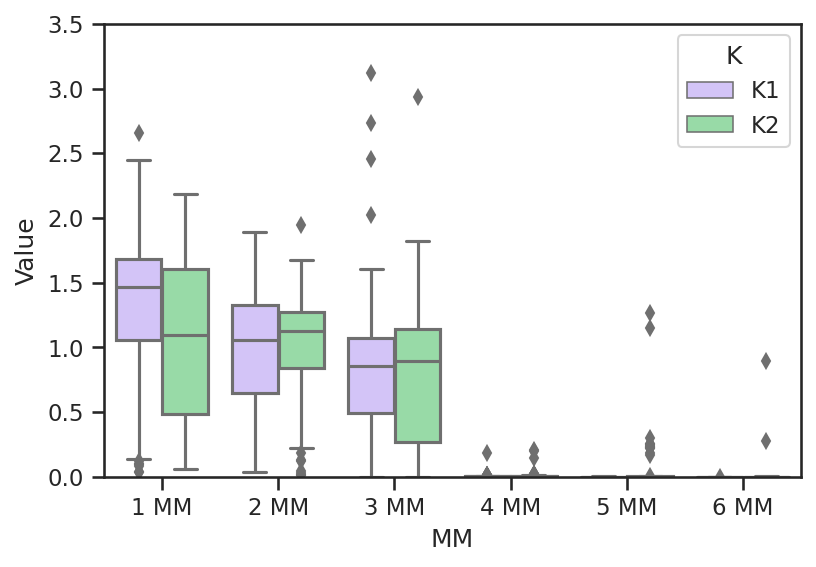

In [173]:
dfsp_long = pd.melt(dfsp, id_vars =['MM'], value_vars =['K1', 'K2'], var_name ='K', value_name ='Value')
dfsp_long.head(10)
sns.set_theme(style="ticks", palette="pastel")
plt.ylim(0 , 3.5)
sns.boxplot(x="MM", y="Value",
            hue="K", palette=["m", "g"],
            data=dfsp_long)
plt.savefig('boxplot_sp-Cas9.pdf')

In [174]:
x = dfsp['K1']
y = dfsp['K2']

In [175]:
scipy.stats.pearsonr(x, y)

(0.8618157994932908, 2.2379768294116578e-284)

In [176]:
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=0.8473337479689592, pvalue=2.7934547505142277e-265)

In [177]:
scipy.stats.kendalltau(x, y)

KendalltauResult(correlation=0.6727183744661366, pvalue=4.06253479413832e-210)

In [178]:
scipy.stats.kendalltau(x, y)

KendalltauResult(correlation=0.6727183744661366, pvalue=4.06253479413832e-210)

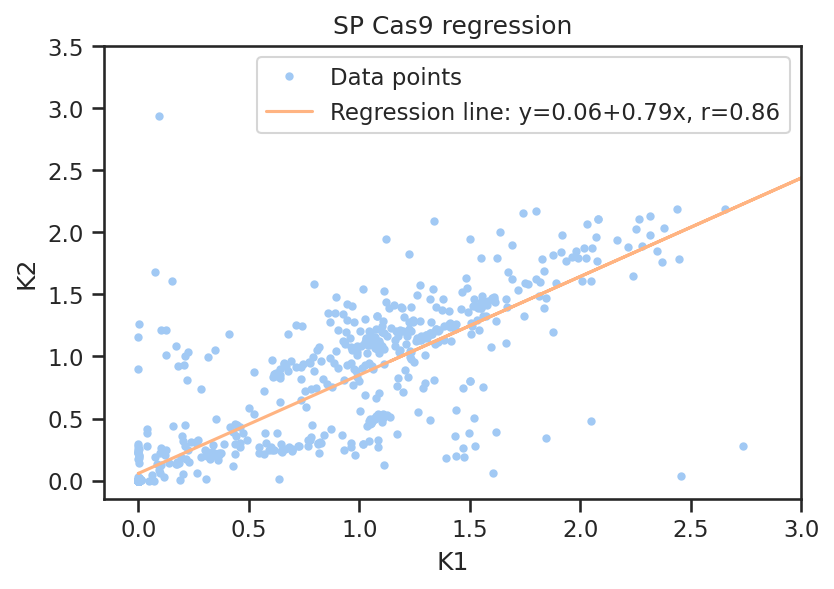

In [179]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='.', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('K1')
ax.set_ylabel('K2')
ax.legend(facecolor='white')
plt.ylim(ymax = 3.5)
plt.xlim(xmax = 3)
plt.title('SP Cas9 regression')
plt.savefig('regression_SPCas9.pdf')